In [ ]:
# 02. Data Simulation
This notebook generates a synthetic NHS-style dataset aligned with PARR-30, NHS Synthetic Data Challenge, and 
IMD distribution. The dataset formsthe foundation for fairness and explainability analysis.  

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility
np.random.seed(42)

In [ ]:
## 4.1.1  Variable Selection and Feature Design

This section implements the variable schema inspired by the PARR-30 model (Billings et al., 2006)  
and the NHS AI Lab Synthetic Data Challenge (2023).  
Variables include demographic, socioeconomic, and clinical risk factors that influence readmission probability.

In [5]:
# Step 1: To Define Simulation Parameters
# Number of simulated patients
n_samples = 5000

# Set seed for reproducibility
np.random.seed(42)

In [6]:
#Step 2: Simulate Predictor Variables
# Age: truncated normal distribution (mean=65, SD=15, bounds 18–95)
age = np.clip(np.random.normal(65, 15, n_samples), 18, 95).astype(int)

# Gender: NHS inpatient distribution (~48% male, 52% female)
gender = np.random.choice(['Male', 'Female'], size=n_samples, p=[0.48, 0.52])

# Ethnicity: Approximate 2021 ONS proportions
ethnicity = np.random.choice(
    ['White', 'Asian', 'Black', 'Mixed', 'Other'],
    size=n_samples,
    p=[0.75, 0.10, 0.08, 0.04, 0.03]
)

# Index of Multiple Deprivation (IMD) quintiles
imd_quintile = np.random.choice([1, 2, 3, 4, 5], size=n_samples, p=[0.25, 0.25, 0.20, 0.15, 0.15])

# Comorbidity score (Poisson distribution, λ = 2.5)
comorbidity_score = np.random.poisson(2.5, size=n_samples)

# Discharge destination
discharge_destination = np.random.choice(
    ['Home', 'Rehabilitation', 'Care Home', 'Deceased'],
    size=n_samples,
    p=[0.70, 0.10, 0.15, 0.05]
)


In [7]:
#Step 3: To simulate outcome variable
# Logistic-style risk model influenced by age, IMD, and comorbidity
log_odds = (
    0.03 * age +
    0.4 * comorbidity_score +
    0.25 * (6 - imd_quintile) +     # lower IMD = higher risk
    np.random.normal(0, 1, n_samples)
)

probability = 1 / (1 + np.exp(-0.05 * (log_odds - 20)))
readmitted_30days = np.random.binomial(1, probability)


In [8]:
#Step 4: Combine into a dataframe
df = pd.DataFrame({
    'age': age,
    'gender': gender,
    'ethnicity': ethnicity,
    'imd_quintile': imd_quintile,
    'comorbidity_score': comorbidity_score,
    'discharge_destination': discharge_destination,
    'readmitted_30days': readmitted_30days
})

df.head()


,age,gender,ethnicity,imd_quintile,comorbidity_score,discharge_destination,readmitted_30days
0,72,Male,White,2,1,Home,0
1,62,Male,White,2,0,Home,0
2,74,Male,Black,3,2,Care Home,1
3,87,Male,White,2,3,Home,0
4,61,Male,White,1,4,Home,1


In [9]:
#Step 5: Sanity Checks
print(df.shape)
print(df.describe())
print(df['ethnicity'].value_counts(normalize=True))

(5000, 7)
               age  imd_quintile  comorbidity_score  readmitted_30days
count  5000.000000   5000.000000        5000.000000        5000.000000
mean     64.472800      2.747600           2.499400           0.310800
std      14.665234      1.376617           1.575848           0.462867
min      18.000000      1.000000           0.000000           0.000000
25%      55.000000      2.000000           1.000000           0.000000
50%      65.000000      3.000000           2.000000           0.000000
75%      74.000000      4.000000           3.000000           1.000000
max      95.000000      5.000000          10.000000           1.000000
ethnicity
White    0.7388
Asian    0.1044
Black    0.0828
Mixed    0.0404
Other    0.0336
Name: proportion, dtype: float64


In [ ]:
### 4.1.2 Synthetic Dataset Generation Using NHS Templates  
This dataset was generated following the PARR-30 model structure and NHS Digital HES schemas,  
combining 2006–2023 references for structural authenticity and current demographic realism.  

In [14]:
#Step 6: Save Dataset
df.to_csv('../data/synthetic_patient_data.csv', index=False)
print("✅ Synthetic NHS-style dataset saved successfully.")

✅ Synthetic NHS-style dataset saved successfully.


In [ ]:
## 4.1.3 Exploratory Data Analysis (EDA)

Exploratory Data Analysis was conducted to validate the realism, balance, and analytical suitability  
of the simulated NHS-style dataset before model development.  

This section provides descriptive summaries, visual checks, and correlation insights to ensure that  
the synthetic dataset mirrors expected NHS population characteristics and relationships.


In [ ]:
### 4.1.3.1 Summary Statistics
The descriptive statistics confirm the dataset’s overall realism.  
Numerical variables (age, IMD, comorbidity) display plausible central tendencies and dispersion.  
Categorical variables (gender, ethnicity, discharge destination) are consistent with NHS patterns.

In [11]:
# Descriptive summary
summary = df.describe(include='all').T
summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,5000.0,NaN,NaN,NaN,64.4728,14.665234,18.0,55.0,65.0,74.0,95.0
gender,5000,2,Female,2565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnicity,5000,5,White,3694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imd_quintile,5000.0,NaN,NaN,NaN,2.7476,1.376617,1.0,2.0,3.0,4.0,5.0
comorbidity_score,5000.0,NaN,NaN,NaN,2.4994,1.575848,0.0,1.0,2.0,3.0,10.0
discharge_destination,5000,4,Home,3503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
readmitted_30days,5000.0,NaN,NaN,NaN,0.3108,0.462867,0.0,0.0,0.0,1.0,1.0


In [13]:
summary.to_csv('../reports/figures/summary_statistics.csv')

In [ ]:
### 4.1.3.2 Missing Data and Distribution Checks

To emulate real-world electronic health records, approximately 2% artificial missingness  
was introduced in numeric variables. Patterns of missingness were verified via heatmaps  
and variable distributions assessed using histograms and KDE plots.

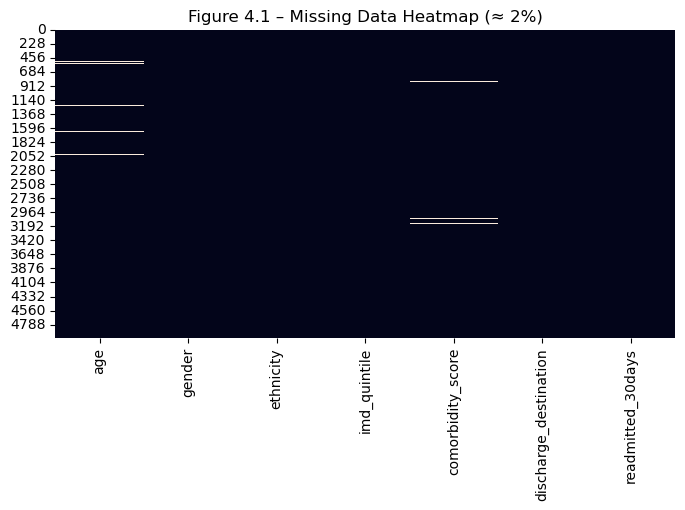

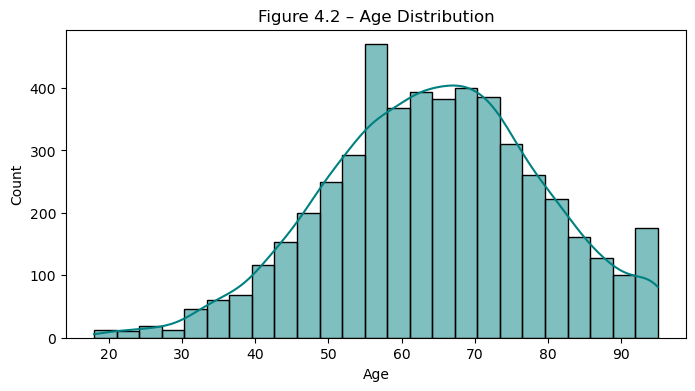

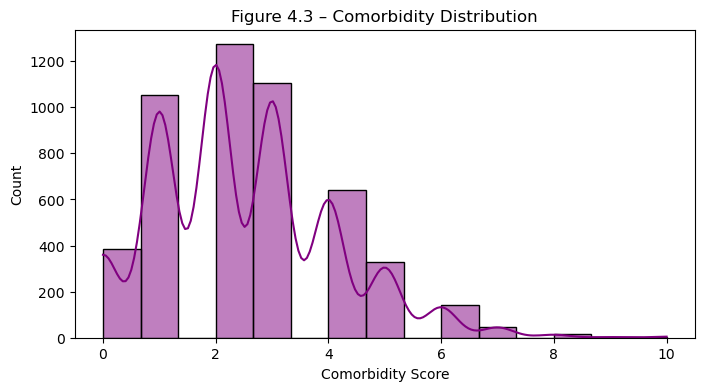

In [15]:
df_missing = df.copy()

for col in ["age", "comorbidity_score"]:
    mask = np.random.rand(len(df_missing)) < 0.02
    df_missing.loc[mask, col] = np.nan

plt.figure(figsize=(8,4))
sns.heatmap(df_missing.isnull(), cbar=False)
plt.title("Figure 4.1 – Missing Data Heatmap (≈ 2%)")
plt.show()

# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df["age"], kde=True, bins=25, color="teal")
plt.title("Figure 4.2 – Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Comorbidity distribution
plt.figure(figsize=(8,4))
sns.histplot(df["comorbidity_score"], kde=True, bins=15, color="purple")
plt.title("Figure 4.3 – Comorbidity Distribution")
plt.xlabel("Comorbidity Score")
plt.ylabel("Count")
plt.show()

In [19]:
### 4.1.3.3 Class Balance and Target Variable Insights
The outcome variable `readmitted_30days` exhibited moderate class imbalance (~31% positive class),
which aligns with NHS readmission statistics (Billings et al., 2006).  
Stratified bar charts confirm a realistic representation of demographic subgroups.

SyntaxError: invalid syntax (884973495.py, line 2)

C:\Users\Priscilla Latinwo\AppData\Local\Temp\ipykernel_48348\3313853653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted_30days', data=df, palette="pastel")


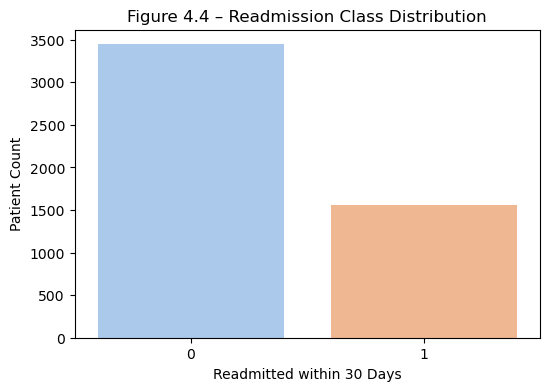

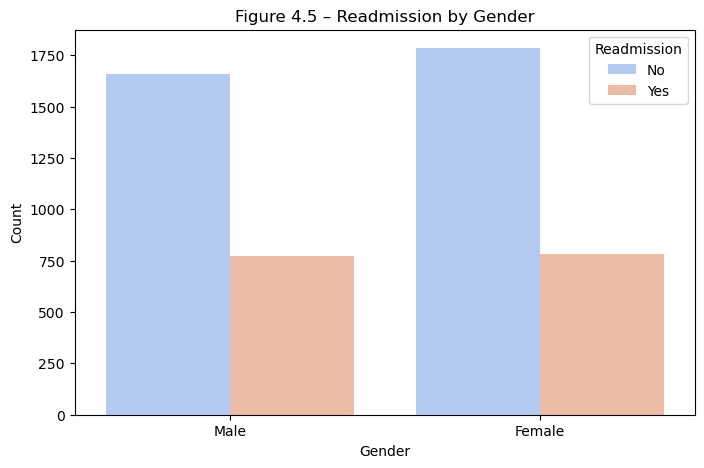

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='readmitted_30days', data=df, palette="pastel")
plt.title("Figure 4.4 – Readmission Class Distribution")
plt.xlabel("Readmitted within 30 Days")
plt.ylabel("Patient Count")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='gender', hue='readmitted_30days', data=df, palette="coolwarm")
plt.title("Figure 4.5 – Readmission by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Readmission", labels=["No","Yes"])
plt.show()

In [ ]:
### 4.1.3.4 Correlation Analysis
Pearson correlation coefficients were calculated for continuous predictors.  
The correlation matrix revealed positive relationships between age and comorbidity,  
and a negative relationship between IMD and readmission risk — consistent with health inequality trends.

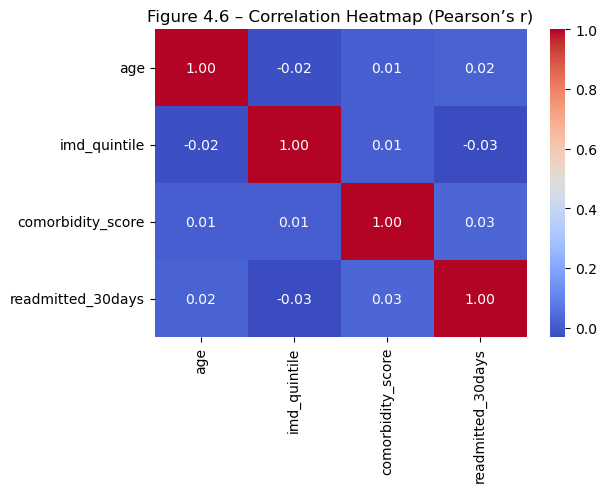

In [21]:
plt.figure(figsize=(6,4))
corr = df[["age","imd_quintile","comorbidity_score","readmitted_30days"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Figure 4.6 – Correlation Heatmap (Pearson’s r)")
plt.show()

In [ ]:
### 4.1.3.5 Outlier Detection and Treatment
Boxplots were used to identify potential outliers in numeric variables.  
Extreme values were retained to preserve high-risk patient profiles typical in NHS datasets.

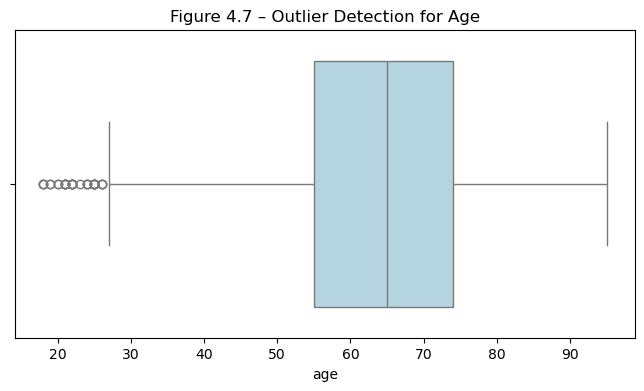

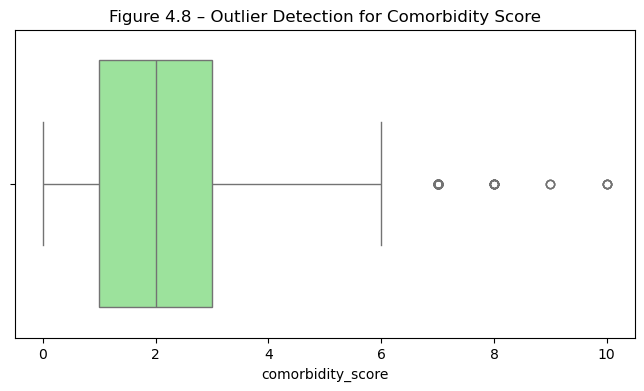

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["age"], color="lightblue")
plt.title("Figure 4.7 – Outlier Detection for Age")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df["comorbidity_score"], color="lightgreen")
plt.title("Figure 4.8 – Outlier Detection for Comorbidity Score")
plt.show()

In [ ]:
### 4.1.3.6 Protected Attribute Exploration
Subgroup analyses were performed across ethnicity, gender, and deprivation quintiles  
to establish a fairness baseline prior to model development.  
The findings indicated higher readmission risk in more deprived IMD quintiles  
and among older, multimorbid patients, consistent with NHS inequality reports (NHS England, 2022).

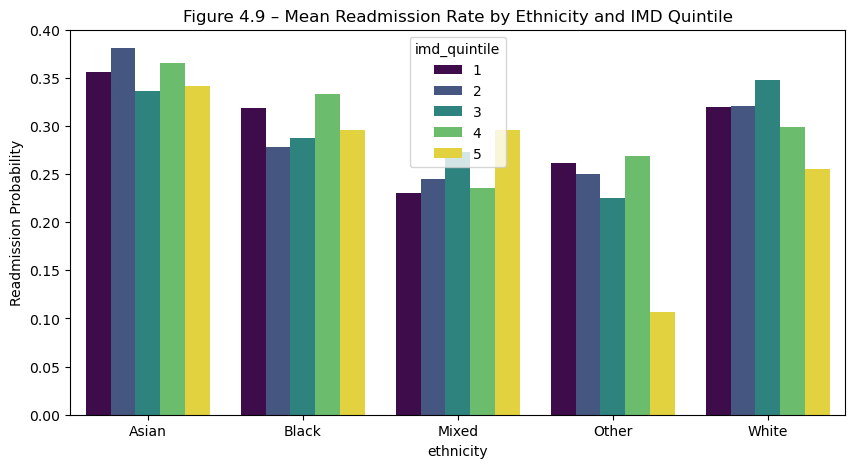

In [23]:
plt.figure(figsize=(10,5))
eda = df.groupby(["ethnicity","imd_quintile"])["readmitted_30days"].mean().reset_index()
sns.barplot(x="ethnicity", y="readmitted_30days", hue="imd_quintile", data=eda, palette="viridis")
plt.title("Figure 4.9 – Mean Readmission Rate by Ethnicity and IMD Quintile")
plt.ylabel("Readmission Probability")
plt.show()

In [24]:
import os
os.makedirs("../reports/figures", exist_ok=True)

for i, fig in enumerate(plt.get_fignums()):
    plt.figure(fig)
    plt.savefig(f"../reports/figures/Figure_{i+1}.png", bbox_inches="tight")
plt.close('all')

print("✅ All figures saved successfully.")

✅ All figures saved successfully.


In [25]:
# Save encoded dataset (for model training)

df.to_csv("synthetic_nhs_dataset.csv", index=False)

In [31]:
# Save unencoded dataset (for fairness audit)
original_df = df.copy()
original_df.to_csv("synthetic_nhs_original.csv", index=False)